
📊 Classification Report for LogReg-Poly2:
              precision    recall  f1-score   support

           0     0.9317    0.8559    0.8922      8704
           1     0.8851    0.9465    0.9148     10209

    accuracy                         0.9048     18913
   macro avg     0.9084    0.9012    0.9035     18913
weighted avg     0.9066    0.9048    0.9044     18913


📊 Classification Report for SVM-RBF:
              precision    recall  f1-score   support

           0     0.9192    0.9643    0.9412      8704
           1     0.9682    0.9277    0.9475     10209

    accuracy                         0.9445     18913
   macro avg     0.9437    0.9460    0.9444     18913
weighted avg     0.9456    0.9445    0.9446     18913


📊 Classification Report for RF-Shallow:
              precision    recall  f1-score   support

           0     0.9949    0.9862    0.9905      8704
           1     0.9883    0.9957    0.9920     10209

    accuracy                         0.9913     18913
   mac

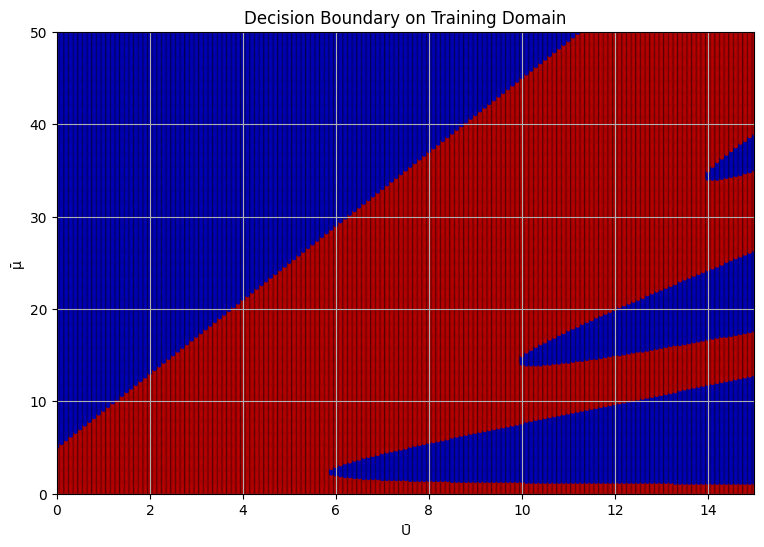

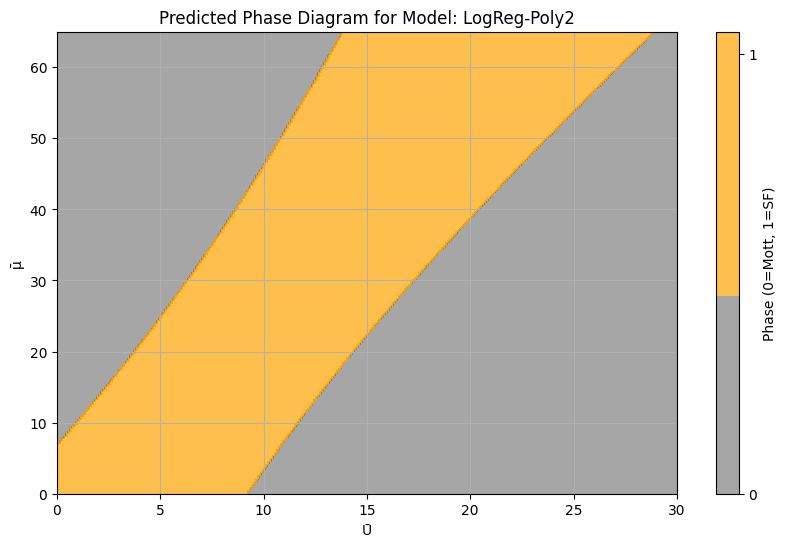


📊 Classification Report For Prediction using Model (Extrapolated Grid vs True, within data domain):
              precision    recall  f1-score   support

           0     0.9324    0.8554    0.8923     34816
           1     0.8848    0.9472    0.9149     40835

    accuracy                         0.9049     75651
   macro avg     0.9086    0.9013    0.9036     75651
weighted avg     0.9067    0.9049    0.9045     75651



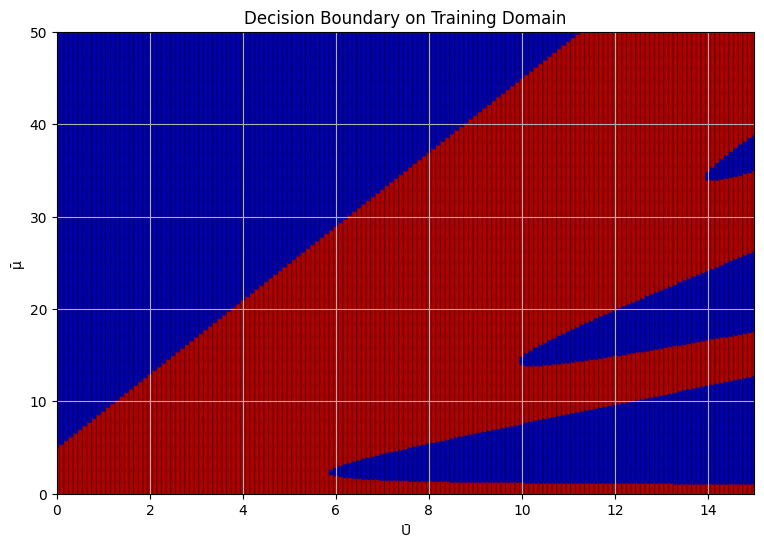

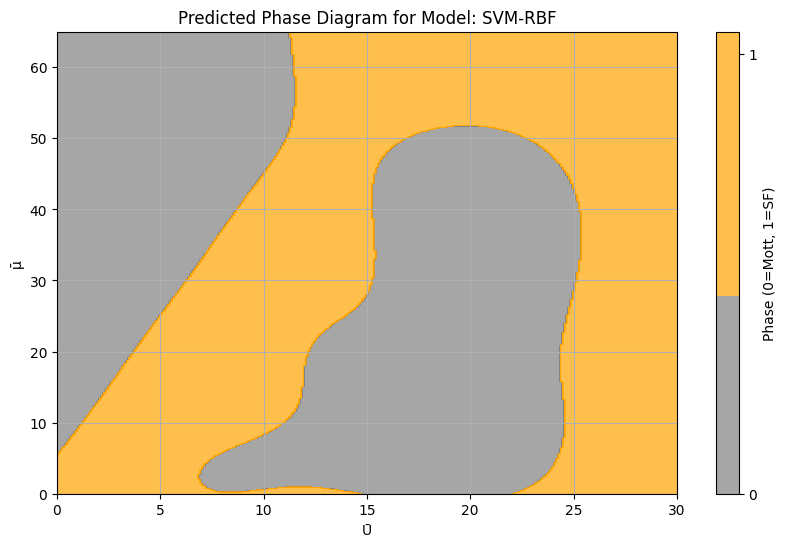


📊 Classification Report For Prediction using Model (Extrapolated Grid vs True, within data domain):
              precision    recall  f1-score   support

           0     0.9226    0.9638    0.9428     34816
           1     0.9679    0.9311    0.9491     40835

    accuracy                         0.9461     75651
   macro avg     0.9453    0.9474    0.9459     75651
weighted avg     0.9471    0.9461    0.9462     75651



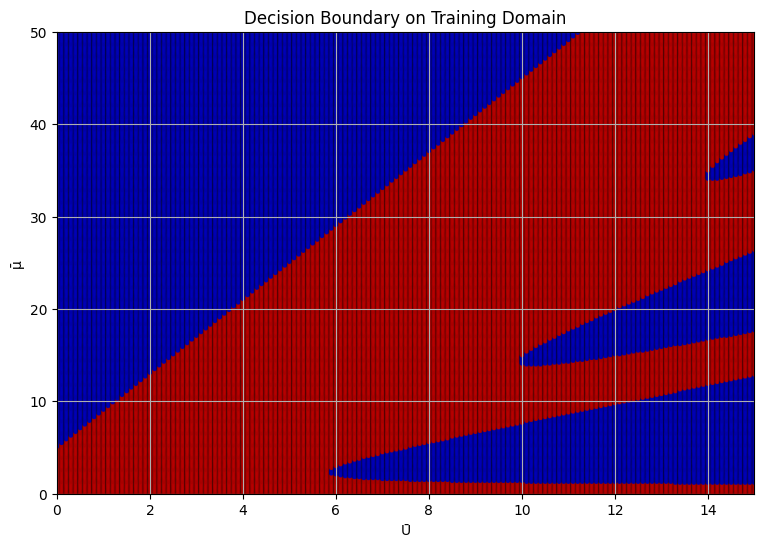

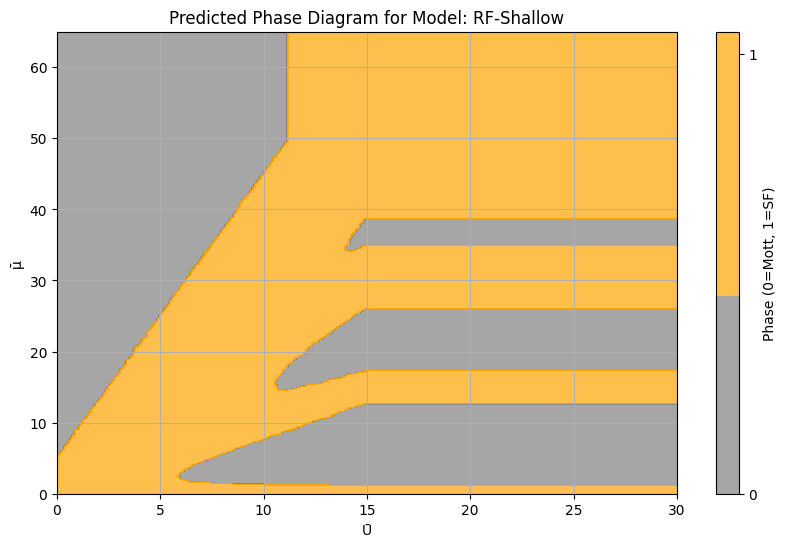


📊 Classification Report For Prediction using Model (Extrapolated Grid vs True, within data domain):
              precision    recall  f1-score   support

           0     0.9976    0.9908    0.9942     34816
           1     0.9922    0.9980    0.9951     40835

    accuracy                         0.9947     75651
   macro avg     0.9949    0.9944    0.9946     75651
weighted avg     0.9947    0.9947    0.9947     75651



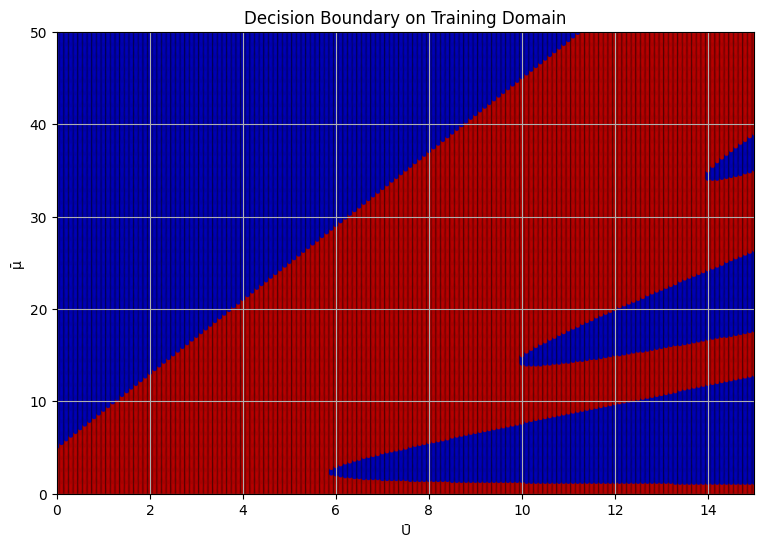

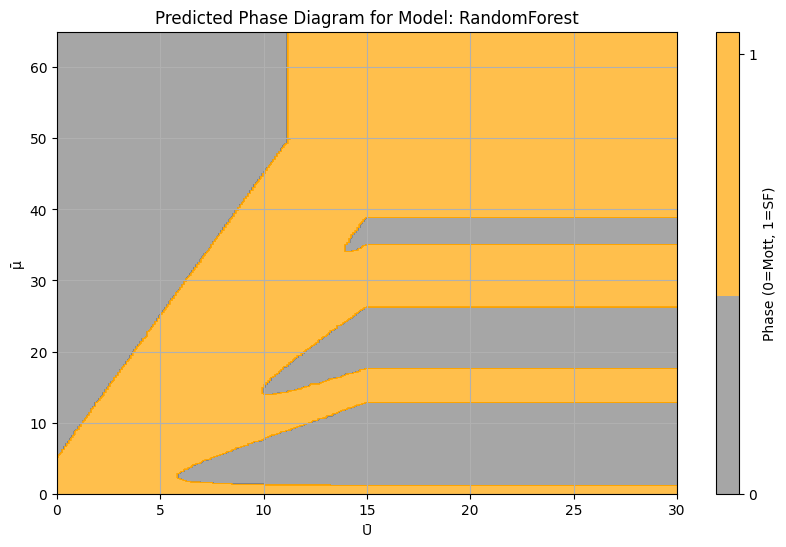


📊 Classification Report For Prediction using Model (Extrapolated Grid vs True, within data domain):
              precision    recall  f1-score   support

           0     0.9983    0.9988    0.9985     34816
           1     0.9989    0.9986    0.9988     40835

    accuracy                         0.9987     75651
   macro avg     0.9986    0.9987    0.9986     75651
weighted avg     0.9987    0.9987    0.9987     75651



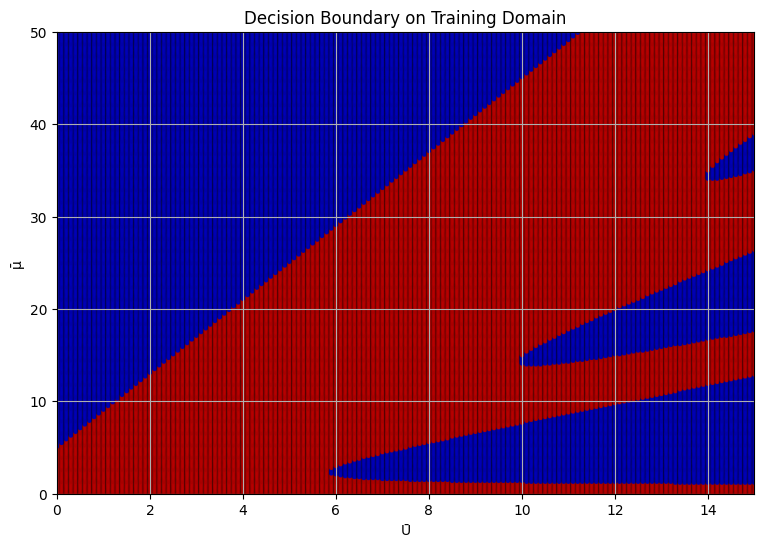

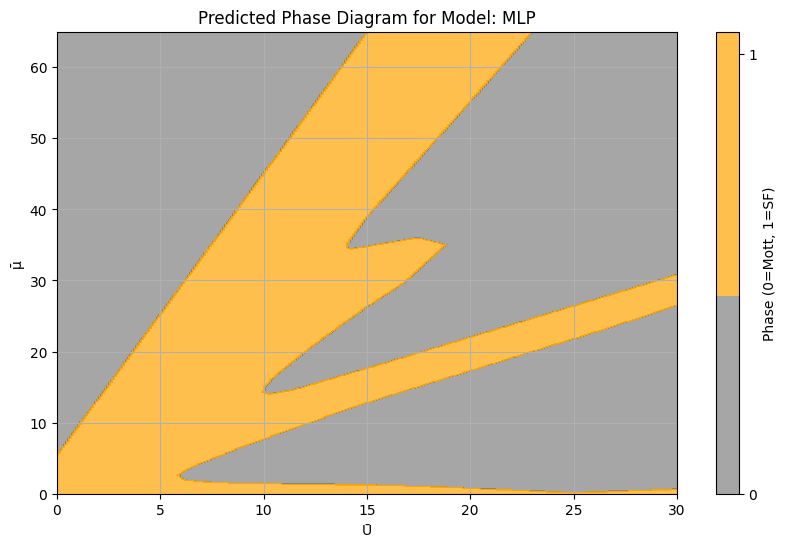


📊 Classification Report For Prediction using Model (Extrapolated Grid vs True, within data domain):
              precision    recall  f1-score   support

           0     0.9995    0.9888    0.9941     34816
           1     0.9905    0.9996    0.9950     40835

    accuracy                         0.9946     75651
   macro avg     0.9950    0.9942    0.9946     75651
weighted avg     0.9947    0.9946    0.9946     75651



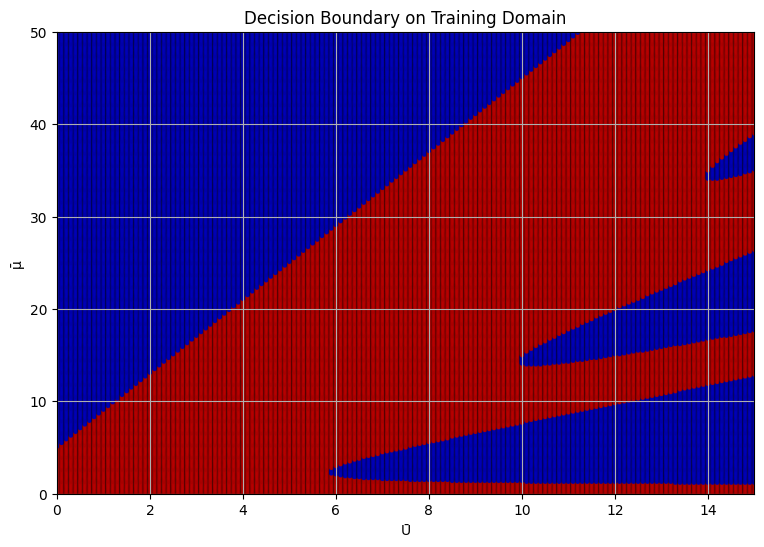

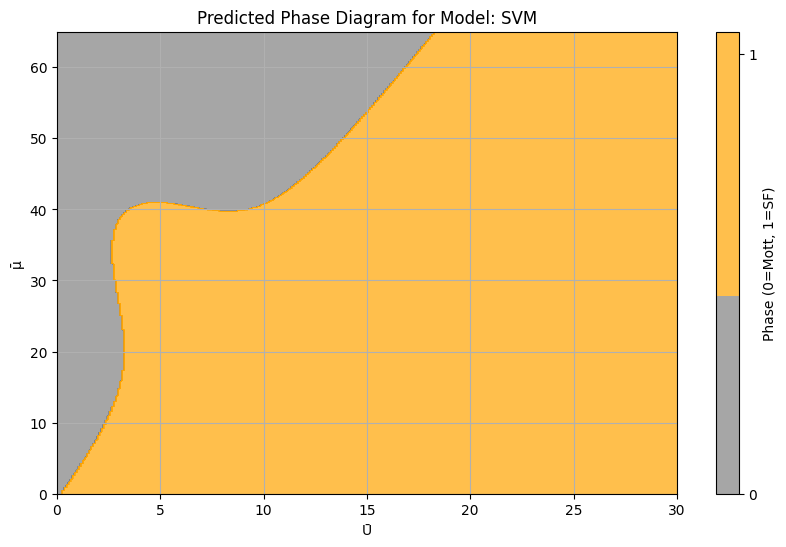


📊 Classification Report For Prediction using Model (Extrapolated Grid vs True, within data domain):
              precision    recall  f1-score   support

           0     0.8389    0.5371    0.6549     34816
           1     0.6979    0.9120    0.7908     40835

    accuracy                         0.7395     75651
   macro avg     0.7684    0.7245    0.7228     75651
weighted avg     0.7628    0.7395    0.7282     75651



In [4]:
# ================================
# Phase Classification: Clean Setup
# (features = [Ubar, Mubar] only)
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

# ---------- 1) Load and label ----------
df = pd.read_csv("phase_t1.0_U15.0-(0.1)_Mu50.0-(0.1).csv")

# Label: 1 = Superfluid, 0 = Mott
df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

# Features and target: **only** Ubar, Mubar
X = df[["Ubar", "Mubar"]].copy()
y = df["Phase"].copy()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25, random_state=42,
    stratify=y
)

# ---------- 2) Models (simple, smooth) ----------
# (A) Logistic Regression with low-degree polynomial features (smooth boundary)
logreg_poly2 = Pipeline(steps=[
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),  # degree=2 or 3
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(C=0.5, max_iter=2000, solver="lbfgs"))
])

# (B) SVM with RBF kernel (smooth boundary, good generalization with proper C/gamma)
svm_rbf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=3.0, gamma=0.5, probability=False))  # tweak C, gamma as needed
])

# (C) RandomForest shallow (to avoid overfitting)
rf_shallow = RandomForestClassifier(
    n_estimators=300, max_depth=10, min_samples_leaf=5,
    random_state=42, n_jobs=-1
)

rf = RandomForestClassifier(
        n_estimators=300, random_state=42, n_jobs=-1)
mlp = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42))
    ])

svm = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="poly", degree=3, C=1.0))
    ])
models = {
    "LogReg-Poly2": logreg_poly2,
    "SVM-RBF": svm_rbf,
    "RF-Shallow": rf_shallow,
    "RandomForest": rf,
    "MLP": mlp,
    "SVM": svm
}

# ---------- 3) Train + Evaluate ----------
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📊 Classification Report for {name}:")
    print(classification_report(y_test, y_pred, digits=4))


for i in models:
    # Choose your favorite model (often SVM-RBF or LogReg-Poly2 generalize best)
    clf = models[i]  # or "LogReg-Poly2" or "RF-Shallow"
    
    # ---------- 4) Plot decision boundary on training domain ----------
    def plot_decision_boundary(model, X, y, title="Decision Boundary", grid_res=300):
        x_min, x_max = X["Ubar"].min(), X["Ubar"].max()
        y_min, y_max = X["Mubar"].min(), X["Mubar"].max()
        xx, yy = np.meshgrid(
            np.linspace(x_min, x_max, grid_res),
            np.linspace(y_min, y_max, grid_res)
        )
        grid_df = pd.DataFrame({"Ubar": xx.ravel(), "Mubar": yy.ravel()})
        Z = model.predict(grid_df).reshape(xx.shape)
    
        plt.figure(figsize=(9, 6))
        plt.contourf(xx, yy, Z, cmap=ListedColormap(['gray', 'orange']), alpha=0.5)
        plt.scatter(X["Ubar"], X["Mubar"], c=y, s=10, cmap=ListedColormap(['blue', 'red']), edgecolor='k', linewidth=0.2)
        plt.xlabel("Ū")
        plt.ylabel("μ̄")
        plt.title(title)
        plt.grid(True)
        plt.show()
    
    plot_decision_boundary(clf, X, y, title="Decision Boundary on Training Domain")
    
    # ---------- 5) Predict on an extended grid (extrapolation) ----------
    U_min, U_max = 0.0, 30.0   # extend beyond training range
    mu_min, mu_max = 0.0, 65.0
    U_step, mu_step = 0.1, 0.1
    
    U_vals = np.arange(U_min, U_max + U_step, U_step)
    mu_vals = np.arange(mu_min, mu_max + mu_step, mu_step)
    U_grid, mu_grid = np.meshgrid(U_vals, mu_vals)
    
    grid_ext = pd.DataFrame({
        "Ubar": U_grid.ravel(),
        "Mubar": mu_grid.ravel()
    })
    
    pred_ext = clf.predict(grid_ext)
    phase_map = pred_ext.reshape(U_grid.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(U_grid, mu_grid, phase_map, cmap=ListedColormap(['gray', 'orange']), alpha=0.7)
    plt.colorbar(ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
    plt.clim(-0.5, 1.5)
    plt.xlabel("Ū")
    plt.ylabel("μ̄")
    plt.title(f"Predicted Phase Diagram for Model: {i}")
    plt.grid(True)
    plt.show()
    
    # ---------- 6) OPTIONAL: Evaluate predictions vs ground truth where available ----------
    # Only compare inside the original data domain (U≤15, μ≤50)
    mask_domain = (grid_ext["Ubar"] <= X["Ubar"].max()) & (grid_ext["Mubar"] <= X["Mubar"].max())
    grid_in_domain = grid_ext[mask_domain].copy()
    pred_in_domain = clf.predict(grid_in_domain)
    
    # Build true labels by nearest neighbor lookup on your dataset (coarse but works)
    # Create a fast lookup table for (Ubar, Mubar) -> Phase by rounding to 1 decimal (since your grid step is 0.1)
    df_lookup = df.copy()
    df_lookup["Ubar_r"] = df_lookup["Ubar"].round(1)
    df_lookup["Mubar_r"] = df_lookup["Mubar"].round(1)
    lookup = df_lookup.groupby(["Ubar_r", "Mubar_r"])["Phase"].mean().round().astype(int).reset_index()
    lookup = lookup.set_index(["Ubar_r", "Mubar_r"])["Phase"]
    
    grid_in_domain["Ubar_r"] = grid_in_domain["Ubar"].round(1)
    grid_in_domain["Mubar_r"] = grid_in_domain["Mubar"].round(1)
    true_labels = lookup.reindex(list(zip(grid_in_domain["Ubar_r"], grid_in_domain["Mubar_r"]))).values
    
    # Drop NaNs (grid points that don't map exactly to a dataset point)
    valid = ~pd.isna(true_labels)
    true_labels = true_labels[valid].astype(int)
    pred_labels = pred_in_domain[valid]
    
    print("\n📊 Classification Report For Prediction using Model (Extrapolated Grid vs True, within data domain):")
    print(classification_report(true_labels, pred_labels, digits=4))


         t  Ubar  Mubar   Density      Phi2      Energy  Iters  Phase
0      1.0   0.0    0.0  3.508448  2.762672   -2.762672      1      1
1      1.0   0.0    0.1  3.587472  2.758786   -3.117533      3      1
2      1.0   0.0    0.2  3.659333  2.748061   -3.479928      4      1
3      1.0   0.0    0.3  3.725149  2.731654   -3.849198      4      1
4      1.0   0.0    0.4  3.785810  2.710462   -4.224786      5      1
...    ...   ...    ...       ...       ...         ...    ...    ...
75646  1.0  15.0   49.6  3.923532  0.979353 -108.544199     27      1
75647  1.0  15.0   49.7  3.928223  0.960605 -108.936789     28      1
75648  1.0  15.0   49.8  3.932737  0.942246 -109.329838     29      1
75649  1.0  15.0   49.9  3.937079  0.924317 -109.723330     29      1
75650  1.0  15.0   50.0  3.941251  0.906863 -110.117248     30      1

[75651 rows x 8 columns]
         t  Ubar  Mubar   Density      Phi2      Energy  Iters  Phase
0      1.0   0.0    0.0  3.508448  2.762672   -2.762672      1  

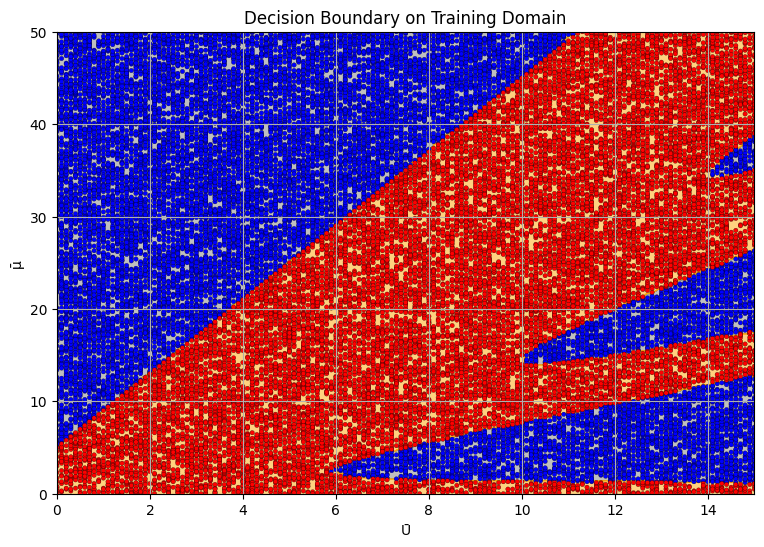

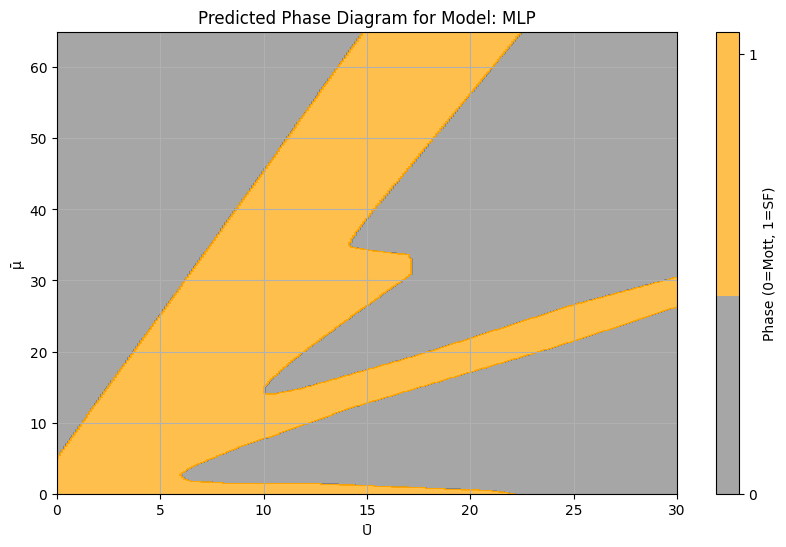


📊 Classification Report For Prediction using Model (Extrapolated Grid vs True, within data domain):
              precision    recall  f1-score   support

           0     0.9965    0.9917    0.9941     15000
           1     0.9918    0.9966    0.9942     15232

    accuracy                         0.9941     30232
   macro avg     0.9942    0.9941    0.9941     30232
weighted avg     0.9942    0.9941    0.9941     30232



In [2]:
# ================================
# Phase Classification: Clean Setup
# (features = [Ubar, Mubar] only)
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

# ---------- 1) Load and label ----------
df = pd.read_csv("phase_t1.0_U15.0-(0.1)_Mu50.0-(0.1).csv")

# Label: 1 = Superfluid, 0 = Mott
def label_phase(rho, phi2, tol_rho=1e-3, tol_phi=1e-6):
    """
    Classify phase:
    - Mott insulator if (rho ~ integer) and (phi^2 ~ 0).
    - Superfluid otherwise.
    """
    is_integer_rho = np.isclose(rho, np.round(rho), atol=tol_rho)
    is_zero_phi = phi2 < tol_phi
    
    if is_integer_rho and is_zero_phi:
        return 0  # Mott
    else:
        return 1  # Superfluid
        
# Apply physics-based labeling (optional, but consistent)
df["Phase"] = df.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)
print(df)

# # Features and targets
# X = df[["Ubar","Mubar"]].values.astype(np.float32)
# y = {
#     "phase": df["Phase"].values.astype(np.float32),
#     "phi2": df["Phi2"].values.astype(np.float32),
#     "rho": df["Density"].values.astype(np.float32),
# }
# --- pick deep MI (phi2 ≈ 0, density ~ integer) ---



df_MI = df[
    (df["Phi2"] < 1e-8) &
    (np.isclose(df["Density"], np.round(df["Density"]), atol=1e-3))
]

# --- pick deep SF (large phi2) ---
df_SF = df[df["Phi2"] > 1e-2]

# --- pick boundary (ambiguous region) ---
df_boundary = df[
    (df["Phi2"] > 1e-6) & (df["Phi2"] < 1e-2)
]

# ------------------------------
# Smart sampling strategy
# ------------------------------
# n_MI = min(2000, len(df_MI))             # cap deep MI
# n_SF = min(2000, len(df_SF))             # cap deep SF
# n_boundary = min(6000, len(df_boundary)) # oversample boundary

n_MI = min(15000, len(df_MI))
n_SF = min(15000, len(df_SF))
n_boundary = min(30000, len(df_boundary))

# n_MI = min(3000, len(df_MI))
# n_SF = min(3000, len(df_SF))
# n_boundary = min(6000, len(df_boundary))


df_reduced = pd.concat([
    df_MI.sample(n_MI, random_state=42),
    df_SF.sample(n_SF, random_state=42),
    df_boundary.sample(n_boundary, random_state=42)
])
print(df)
df_reduced = df_reduced.reset_index(drop=True)
# Use reduced dataset
df = df_reduced.reset_index(drop=True)
print(df)
        
# # Label: 1 = Superfluid, 0 = Mott
# df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

# Features and target: **only** Ubar, Mubar
X = df[["Ubar", "Mubar"]].copy()
y = df["Phase"].copy()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25, random_state=42,
    stratify=y
)

# ---------- 2) Models (simple, smooth) ----------

mlp = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42))
    ])


models = {
    "MLP": mlp
}

# ---------- 3) Train + Evaluate ----------
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📊 Classification Report for {name}:")
    print(classification_report(y_test, y_pred, digits=4))


for i in models:
    # Choose your favorite model (often SVM-RBF or LogReg-Poly2 generalize best)
    clf = models[i]  # or "LogReg-Poly2" or "RF-Shallow"
    
    # ---------- 4) Plot decision boundary on training domain ----------
    def plot_decision_boundary(model, X, y, title="Decision Boundary", grid_res=300):
        x_min, x_max = X["Ubar"].min(), X["Ubar"].max()
        y_min, y_max = X["Mubar"].min(), X["Mubar"].max()
        xx, yy = np.meshgrid(
            np.linspace(x_min, x_max, grid_res),
            np.linspace(y_min, y_max, grid_res)
        )
        grid_df = pd.DataFrame({"Ubar": xx.ravel(), "Mubar": yy.ravel()})
        Z = model.predict(grid_df).reshape(xx.shape)
    
        plt.figure(figsize=(9, 6))
        plt.contourf(xx, yy, Z, cmap=ListedColormap(['gray', 'orange']), alpha=0.5)
        plt.scatter(X["Ubar"], X["Mubar"], c=y, s=10, cmap=ListedColormap(['blue', 'red']), edgecolor='k', linewidth=0.2)
        plt.xlabel("Ū")
        plt.ylabel("μ̄")
        plt.title(title)
        plt.grid(True)
        plt.show()
    
    plot_decision_boundary(clf, X, y, title="Decision Boundary on Training Domain")
    
    # ---------- 5) Predict on an extended grid (extrapolation) ----------
    U_min, U_max = 0.0, 30.0   # extend beyond training range
    mu_min, mu_max = 0.0, 65.0
    U_step, mu_step = 0.1, 0.1
    
    U_vals = np.arange(U_min, U_max + U_step, U_step)
    mu_vals = np.arange(mu_min, mu_max + mu_step, mu_step)
    U_grid, mu_grid = np.meshgrid(U_vals, mu_vals)
    
    grid_ext = pd.DataFrame({
        "Ubar": U_grid.ravel(),
        "Mubar": mu_grid.ravel()
    })
    
    pred_ext = clf.predict(grid_ext)
    phase_map = pred_ext.reshape(U_grid.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(U_grid, mu_grid, phase_map, cmap=ListedColormap(['gray', 'orange']), alpha=0.7)
    plt.colorbar(ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
    plt.clim(-0.5, 1.5)
    plt.xlabel("Ū")
    plt.ylabel("μ̄")
    plt.title(f"Predicted Phase Diagram for Model: {i}")
    plt.grid(True)
    plt.show()
    
    # ---------- 6) OPTIONAL: Evaluate predictions vs ground truth where available ----------
    # Only compare inside the original data domain (U≤15, μ≤50)
    mask_domain = (grid_ext["Ubar"] <= X["Ubar"].max()) & (grid_ext["Mubar"] <= X["Mubar"].max())
    grid_in_domain = grid_ext[mask_domain].copy()
    pred_in_domain = clf.predict(grid_in_domain)
    
    # Build true labels by nearest neighbor lookup on your dataset (coarse but works)
    # Create a fast lookup table for (Ubar, Mubar) -> Phase by rounding to 1 decimal (since your grid step is 0.1)
    df_lookup = df.copy()
    df_lookup["Ubar_r"] = df_lookup["Ubar"].round(1)
    df_lookup["Mubar_r"] = df_lookup["Mubar"].round(1)
    lookup = df_lookup.groupby(["Ubar_r", "Mubar_r"])["Phase"].mean().round().astype(int).reset_index()
    lookup = lookup.set_index(["Ubar_r", "Mubar_r"])["Phase"]
    
    grid_in_domain["Ubar_r"] = grid_in_domain["Ubar"].round(1)
    grid_in_domain["Mubar_r"] = grid_in_domain["Mubar"].round(1)
    true_labels = lookup.reindex(list(zip(grid_in_domain["Ubar_r"], grid_in_domain["Mubar_r"]))).values
    
    # Drop NaNs (grid points that don't map exactly to a dataset point)
    valid = ~pd.isna(true_labels)
    true_labels = true_labels[valid].astype(int)
    pred_labels = pred_in_domain[valid]
    
    print("\n📊 Classification Report For Prediction using Model (Extrapolated Grid vs True, within data domain):")
    print(classification_report(true_labels, pred_labels, digits=4))
